# E-commerce Demand Forecasting

### Aim : *To Predict future product demand to optimize inventory and reduce stockouts & overstocking*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/train.csv")

 ## Exploratory Data Analysis (EDA) 

### 1. Understanding Dataset

In [4]:
# Understanding Data
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df.shape

(913000, 4)

In [6]:
df.info()  # So no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
df.sample()

,date,store,item,sales
353388,2015-08-29,4,20,68


In [9]:
# Total sales of each item
# Insight-1: Total number of distinct items = 50
arr = df.groupby("item")["sales"].sum()
arr

item
1      401384
2     1069564
3      669087
4      401907
5      335230
6     1068281
7     1068777
8     1405108
9      938379
10    1337133
11    1271925
12    1271534
13    1539621
14    1071531
15    1607442
16     468480
17     602486
18    1538876
19     736892
20     867641
21     736190
22    1469971
23     534979
24    1205975
25    1473334
26     869981
27     402628
28    1604713
29    1271240
30     736554
31    1070845
32     803107
33    1270183
34     469935
35    1201541
36    1406548
37     534258
38    1470330
39     801311
40     534094
41     401759
42     669925
43     936635
44     536811
45    1471467
46    1070764
47     401781
48     937703
49     535663
50    1203009
Name: sales, dtype: int64

In [10]:
arr.max()

1607442

In [11]:
# Insight-2: Item with max sales = 15
max_sales_item = arr.argmax()+1
max_sales_item

np.int64(15)

In [12]:
#Insight-3: Total number of stores = 10 
df.groupby("store").count()

,date,item,sales
store,,,
1,91300,91300,91300
2,91300,91300,91300
3,91300,91300,91300
4,91300,91300,91300
5,91300,91300,91300
6,91300,91300,91300
7,91300,91300,91300
8,91300,91300,91300
9,91300,91300,91300


In [13]:
# Insight-4 : Dataset has data of 1826 days
df.groupby("date").count()

,store,item,sales
date,,,
2013-01-01,500,500,500
2013-01-02,500,500,500
2013-01-03,500,500,500
2013-01-04,500,500,500
2013-01-05,500,500,500
...,...,...,...
2017-12-27,500,500,500
2017-12-28,500,500,500
2017-12-29,500,500,500


In [14]:
# Insight-4: Dataset has no Null or Missing values
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [15]:
# Insight-5: Dataset has no Duplicate values
df.duplicated().sum()

np.int64(0)

### About the Dataset 
1. *It is a time series dataset having 91300 rows x 4 cols*
2. *Features include - date,item(50 items),store(10 stores),sales*
3. *It has no Missing and Duplicate values*
4. *Dates for 1826 days from 2013-2017*

In [16]:
# Converting object into datetime datatype and sorting them
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)
df

,date,store,item,sales
0,2013-01-01,1,1,13
211816,2013-01-01,7,12,26
832656,2013-01-01,7,46,27
213642,2013-01-01,8,12,54
215468,2013-01-01,9,12,35
...,...,...,...,...
619013,2017-12-31,9,34,21
620839,2017-12-31,10,34,32
622665,2017-12-31,1,35,55
598927,2017-12-31,8,33,100


### 2. Data Visualization

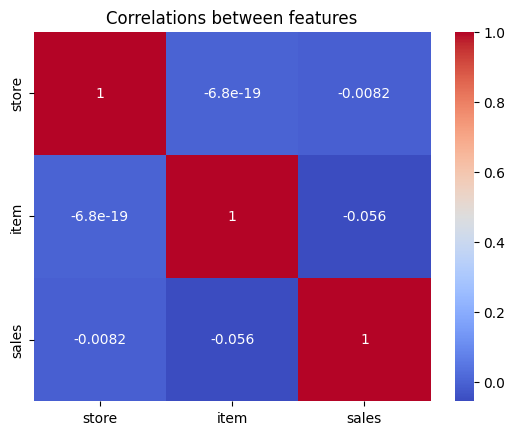

In [17]:
# Correlations between features
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlations between features")
plt.savefig("../plots/eda_plots/correation.png")
plt.show()

### *Interpretation*
- *Correlation heatmap is not useful for categorical features like store and item*

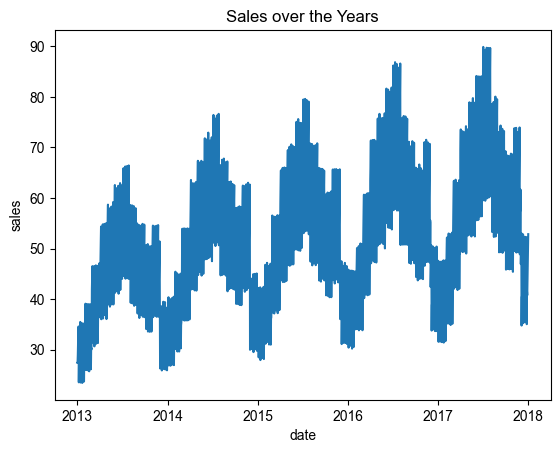

In [18]:
# Sales trend over the years
sns.lineplot(
    data=df,
    x="date",
    y="sales",
    errorbar=None
)
plt.title("Sales over the Years")
sns.set_style("dark")
plt.savefig("../plots/eda_plots/sales_trend.png")
plt.show()

### *Interpretaion*
1. *Upward trend (Increasing demand over the years)*
2. *Strong seasonality*
3. *Repeating yearly patterns*

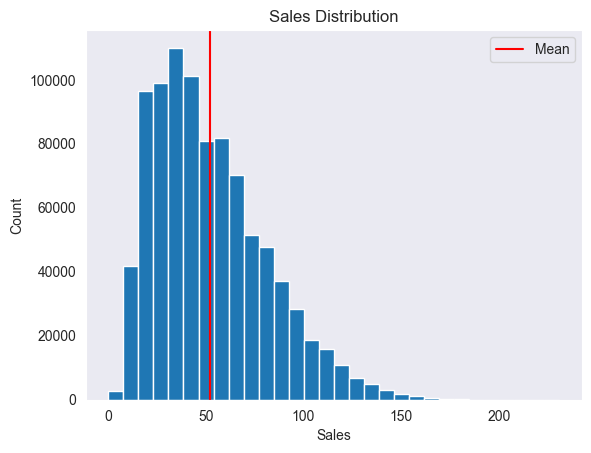

In [19]:
# Sales Distribution
plt.hist(df["sales"], bins=30)
sales_mean = df["sales"].mean()
plt.axvline(x=sales_mean,color="red",label="Mean")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.legend()
plt.savefig("../plots/eda_plots/sales_distribution.png")
plt.show()

### *Interpretation*
1. *Most days sales are moderate around 0-100 units.*
2. *But some days sales are big around 100-180 units.*
3. *The presence of a long tail of high sales values makes the distribution right-skewed.*
4. *So, This indicates that sales is more for less number of units.*
5. *And sales volume is less for large number of units.*

In [20]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
211816,2013-01-01,7,12,26
832656,2013-01-01,7,46,27
213642,2013-01-01,8,12,54
215468,2013-01-01,9,12,35


In [21]:
df.groupby("store")["sales"].mean()

store
1     47.268379
2     67.033165
3     59.530602
4     54.902946
5     39.770164
6     39.733516
7     36.363735
8     64.142048
9     55.049025
10    58.709288
Name: sales, dtype: float64

In [22]:
df.groupby("item")["sales"].mean()

item
1     21.981599
2     58.574151
3     36.642223
4     22.010241
5     18.358708
6     58.503888
7     58.531051
8     76.950055
9     51.389869
10    73.227437
11    69.656353
12    69.634940
13    84.316594
14    58.681873
15    88.030778
16    25.656079
17    32.994852
18    84.275794
19    40.355531
20    47.515936
21    40.317087
22    80.502245
23    29.297864
24    66.044633
25    80.686418
26    47.644085
27    22.049726
28    87.881325
29    69.618839
30    40.337021
31    58.644304
32    43.981763
33    69.560953
34    25.735761
35    65.801807
36    77.028916
37    29.258379
38    80.521906
39    43.883406
40    29.249398
41    22.002136
42    36.688116
43    51.294359
44    29.398193
45    80.584173
46    58.639869
47    22.003341
48    51.352848
49    29.335323
50    65.882202
Name: sales, dtype: float64

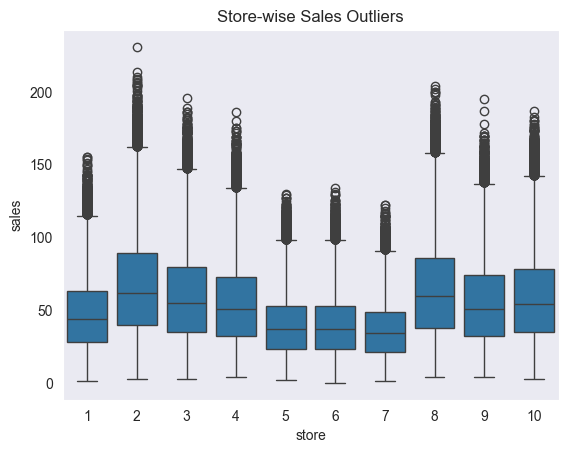

In [25]:
sns.boxplot(x='store', y='sales', data=df)
plt.title("Store-wise Sales Outliers")
plt.savefig("../plots/eda_plots/sales_outliers.png")
plt.show()

### *Interpretaion*
1. *All stores have outliers so they are not data errors*
2. *So we will not remove outliers*
3. *Store is important feature so modeling should be more store specific*

### EDA Done

In [29]:
df.to_csv("../data/processed/cleaned_data.csv", index=False)